**Close your eyes and bear with me to listen and open your third eye to see!**

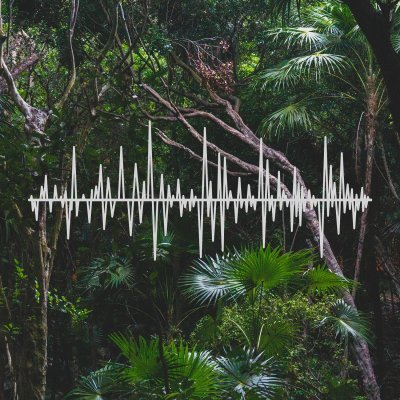

# Audio File Basic Information

**Sound waves are digitized by sampling them at discrete intervals known as the sampling rate (typically 44.1kHz for CD-quality audio meaning samples are taken 44,100 times per second). Each sample is the amplitude of the wave at a particular time interval, where the bit depth determines how detailed the sample will be also known as the dynamic range of the signal (typically 16bit which means a sample can range from 65,536 amplitude values).**

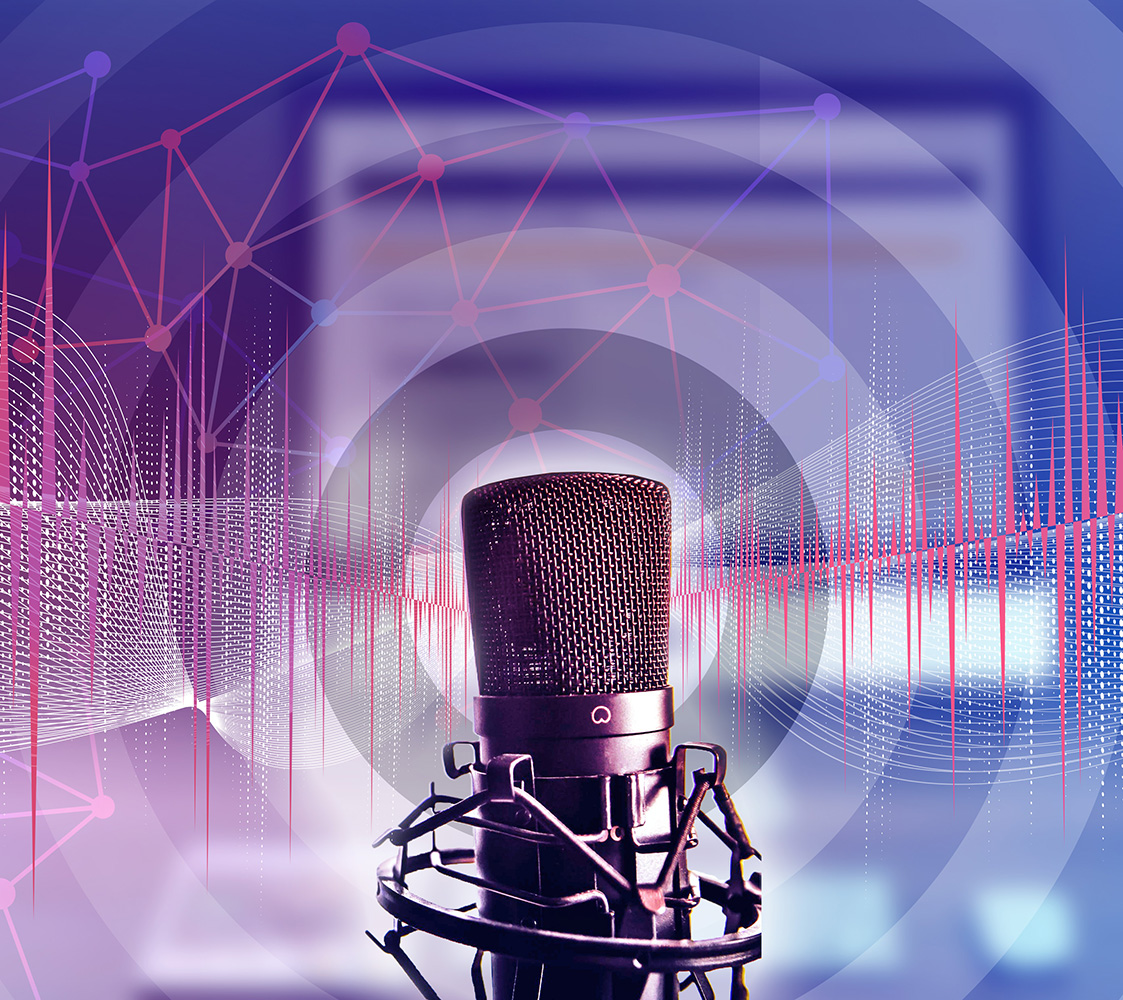

# What is audio format and  what are the main types?

**Audio format just refers to the music format. It is a file format for storing digital audio data on a computer system. The maximum bandwidth of audio format is 20KHz, with a rate between 40 to 50KHz. By adopting liner PCM (pulse-code modulation), each quantized step length of the audio is the same.he bit layout of the audio data (excluding metadata) is called the audio coding format and can be uncompressed, or compressed to reduce the file size, therefore, audio file formats can be divided into lossy compression and lossless compression. But what we often use is lossy compression. Since there is data loss in the audio digital process, we cannot reach the truly lossless.Lossless compression formats include the common APE, FLAC, ALAC, WMA, etc. In addition, CD generally adopts a WAV file format, since WAV files are uncompressed raw audio file with a large volume, it is often compressed into FLAC or APE with smaller volume.**

# What is Sampling and Sampling frequency?

***In signal processing, sampling is the reduction of a continuous signal into a series of discrete values. The sampling frequency or rate is the number of samples taken over some fixed amount of time. A high sampling frequency results in less information loss but higher computational expense, and low sampling frequencies have higher information loss but are fast and cheap to compute.***

# Audio Data Handling

**Python has some great libraries for audio processing like Librosa and PyAudio.There are also built-in modules for some basic audio functionalities.**

In [ ]:
#Install libraries
!pip install librosa

*Loading an audio file:*

In [ ]:
import librosa
audio_data1 = '../input/rfcx-species-audio-detection/train/005f1f9a5.flac'
x , sr = librosa.load(audio_data1)
print(type(x), type(sr))
print(x.shape, sr)

> This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.

In [ ]:
librosa.load(audio_data1, sr=44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data1)

In [ ]:
audio_data2 = '../input/rfcx-species-audio-detection/train/00834f88e.flac'
x , sr = librosa.load(audio_data2)
print(type(x), type(sr))
print(x.shape, sr)

In [ ]:
librosa.load(audio_data2, sr=44100)

In [ ]:
ipd.Audio(audio_data2)

**Let's plot a graph to visualize the audio data**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Spectrogram
 
A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

**Creating an audio signal**

In [ ]:
import numpy as np
sr1 = 23000 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr1), endpoint=False) # time variable
x1 = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x1, rate=sr1) # load a NumPy array

# Feature extraction from Audio signal

**The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located.**

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

**Spectral Rolloff is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.**

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

**The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum and is represented by the two vertical red lines and λSB on the wavelength axis.
**

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

**A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.**

In [ ]:
x, sr = librosa.load('../input/rfcx-species-audio-detection/train/00ad36516.flac')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

**The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.**

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=40000)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')